In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from pylab import *


In [2]:
#import the xyz files and get the atoms in a list
CO_O_Ru = pd.read_csv('CO_O_Ru.csv', sep=',', header=None)
print(CO_O_Ru.values)

[[0.00709277 0.9853895020000001 0.820757602 'Ru']
 [0.34229643200000004 0.9877208909999999 0.821810248 'Ru']
 [0.674113367 0.99165528 0.8218475759999999 'Ru']
 [0.010228858 0.234882321 0.8274280909999999 'Ru']
 [0.34663815299999995 0.236744433 0.822079008 'Ru']
 [0.671452808 0.236251828 0.82131752 'Ru']
 [0.019544913 0.487510946 0.822915153 'Ru']
 [0.34137203899999996 0.488880452 0.822198458 'Ru']
 [0.6650049170000001 0.487131858 0.822945015 'Ru']
 [0.008492572 0.74077902 0.819809474 'Ru']
 [0.336915973 0.7408602540000001 0.8201230279999999 'Ru']
 [0.667275991 0.749135613 0.823172715 'Ru']
 [0.016991096 0.223166012 0.8970109620000001 'C']
 [0.023469247999999998 0.21277234399999997 0.9399566690000001 'O']
 [0.785673003 0.5733024489999999 0.8671262740000001 'O']]


In [3]:
# Brilliant.  Moving on.  
# Get the lattice vectors.
lattice_vectors = pd.read_csv('lattice_vectors.csv', sep=',', header=None)
print(lattice_vectors.values)


[[ 8.31557575  0.          0.        ]
 [ 5.54371717  9.60199979  0.        ]
 [ 0.          0.         26.78963917]]


In [4]:
# Convert to Angstroms instead of fractions of the unit cell vectors.
# An N-atom by 3 matrix times 3x3 lattice matrix yields an Nx3 matrix.
CO_O_Ru_angs=np.matmul(CO_O_Ru.iloc[:, 0:3],lattice_vectors)
CO_O_Ru_angs = np.array(CO_O_Ru_angs)
print(CO_O_Ru_angs)

[[ 5.52170116  9.46170979 21.9878    ]
 [ 8.32203717  9.48409579 22.01600001]
 [11.10309716  9.52187379 22.01700001]
 [ 1.38718     2.25534    22.1665    ]
 [ 4.19494     2.27322    22.02319999]
 [ 6.89323     2.26849    22.0028    ]
 [ 2.86515     4.68108    22.04560002]
 [ 5.54892     4.69423    22.02640002]
 [ 8.23042     4.67744    22.04640001]
 [ 4.17728999  7.11296    21.9624    ]
 [ 6.90877     7.11374    21.9708    ]
 [ 9.70178     7.1932     22.05250001]
 [ 1.37846     2.14284    24.0306    ]
 [ 1.37471001  2.04304    25.1811    ]
 [ 9.71155     5.50485    23.23      ]]


In [5]:
# Slice off unnecessary z-space below.  Convert to atomic units of length.
CO_O_Ru_angs[:, 2] = CO_O_Ru_angs[:, 2] - 20
CO_O_Ru_au = CO_O_Ru_angs/0.52917721067121
print(CO_O_Ru_au)

[[10.43450294 17.88004019  3.7563976 ]
 [15.72637105 17.92234359  3.80968789]
 [20.98181278 17.99373367  3.81157762]
 [ 2.62139028  4.26197491  4.09409165]
 [ 7.9272877   4.29576322  3.82329388]
 [13.02631682  4.28682482  3.78474349]
 [ 5.41434882  8.84595918  3.86562379]
 [10.4859391   8.87080907  3.82934105]
 [15.5532397   8.83908057  3.86713556]
 [ 7.89393404 13.44154633  3.70839854]
 [13.05568317 13.44302034  3.72427224]
 [18.33370714 13.59317797  3.87866289]
 [ 2.60491187  4.04938073  7.61673013]
 [ 2.59782541  3.86078607  9.79086002]
 [18.35216975 10.40265885  6.10381538]]


In [6]:
#Ready to start iterating?
a1 = 24
a2 = 24
a3 = 24
vertices = np.array([[ 1/2*a1,  1/2*a2,   1/2*a3],
                     [ 1/2*a1,  0.,       0.],
                     [ 0.,      1/2*a2,   0.],
                     [ 0.,      0.,       1/2*a3]])
print(vertices)

[[12. 12. 12.]
 [12.  0.  0.]
 [ 0. 12.  0.]
 [ 0.  0. 12.]]


In [33]:
CO_O_Ru = np.array(CO_O_Ru)
V_ext_oper = np.zeros((len(vertices),len(vertices)))
split = np.linspace(0,a1,16)
#print(split_x)

V_ext_x = []

for i in split:
    #V_ext = 0
    
    for j in range(len(CO_O_Ru_angs)):

        distance_x = np.sqrt(np.power(CO_O_Ru_au[j,0] - i,2))


        pseudopotential_x = np.exp(-np.power(distance_x/(1),2))

        #print(pseudopotential)
        element = CO_O_Ru[j,3]
        if element == 'Ru':
            charge = 44
        elif element == 'C':
            charge = 6
        elif element == 'O':
            charge = 8
        else:
            charge = 0.0

        V_ext_x.append(-28*charge*pseudopotential_x) #28 is all the valence electrons of the system


print(min(V_ext_x))
print(np.sum(V_ext_x)/16)
#V_ext_oper[0,0] = -V_ext
#print(V_ext_oper)

-1225.5035086502123
-1064.0605215500118


In [8]:
#fig = sns.heatmap(V_ext_oper, linewidth=0.5)
#plt.savefig('CO2_Ru_V_ext_beta.png',dpi=300)

In [9]:
# Great!  Now, move on to the kinetic energy.  
# The kinetic energy matrix will also be diagonal.
# There is one kinetic energy at each spatial point.
# It is a second derivative.

In [10]:
E_kin_oper = -(1/np.power((25/2),2))*np.array([[-6, 4, 4, 4],
                       [4, -2, 0, 0],
                       [4, 0, -2, 0],
                       [4, 0, 0, -2]])
print(E_kin_oper)

[[ 0.0384 -0.0256 -0.0256 -0.0256]
 [-0.0256  0.0128 -0.     -0.    ]
 [-0.0256 -0.      0.0128 -0.    ]
 [-0.0256 -0.     -0.      0.0128]]


In [11]:
#fig = sns.heatmap(E_kin_oper, linewidth=0.5)
#plt.savefig('CO2_Ru_E_kin.png',dpi=300)

In [12]:

first_type = np.exp(-np.power(1/2*a1,2))
second_type = np.exp(-(2*np.power(1/2*a1,2))) # Only valid with a cube.
V_e_e_oper = np.array([[0, first_type, first_type, first_type],
                      [first_type, 0, second_type, second_type],
                      [first_type, second_type, 0, second_type],
                      [first_type, second_type, second_type, 0]])
V_e_e_oper = np.zeros((4,4))
print(V_e_e_oper)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [13]:
#fig = sns.heatmap(V_e_e_oper, linewidth=0.5)
#plt.savefig('CO2_Ru_V_e_e.png',dpi=300)

In [34]:
V_nuc_scalar = 0
for k in range(len(CO_O_Ru_au)):
    for l in range(len(CO_O_Ru_au)):
        if k!=l:
            distance = np.sqrt(np.sum(np.power(CO_O_Ru_au[k,:] - CO_O_Ru_au[l,:],2)))
            element1 = CO_O_Ru[k,3]
            if element1 == 'Ru':
                charge1 = 44
            elif element1 == 'C':
                charge1 = 6
            elif element1 == 'O':
                charge1 = 8
            else:
                charge1 = 0.0
            element2 = CO_O_Ru[l,3]
            if element2 == 'Ru':
                charge2 = 44
            elif element2 == 'C':
                charge2 = 6
            elif element2 == 'O':
                charge2 = 8
            else:
                charge2 = 0.0
            pseudopotential = charge1*charge2*np.exp(-np.power(distance/(1),2))
            V_nuc_scalar += charge*pseudopotential/2 #Divided by two because otherwise every pair interaction is counted twice
print(V_nuc_scalar)
V_nuc_oper = V_nuc_scalar*np.eye(4)
print(V_nuc_oper)

3.2907599324517207
[[3.29075993 0.         0.         0.        ]
 [0.         3.29075993 0.         0.        ]
 [0.         0.         3.29075993 0.        ]
 [0.         0.         0.         3.29075993]]


In [15]:
H_oper = V_ext_oper + E_kin_oper + V_e_e_oper + V_nuc_oper
#fig = sns.heatmap(H_oper, linewidth=0.5)
#plt.savefig('CO2_Ru_H.png',dpi=300)
print(H_oper)

[[ 6.61991986 -0.0256     -0.0256     -0.0256    ]
 [-0.0256      6.59431986  0.          0.        ]
 [-0.0256      0.          6.59431986  0.        ]
 [-0.0256      0.          0.          6.59431986]]


eigenvalues:  [6.65327092 6.56096881 6.59431986 6.59431986]
minimum eigenvalue: 
6.560968808577503
minimum eigenvector: 
[-0.60110311 -0.46140187 -0.46140187 -0.46140187]


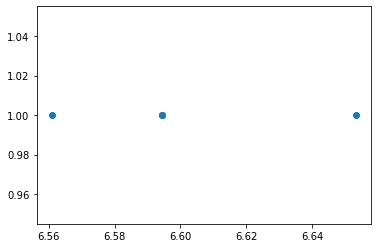

In [16]:
w, v = np.linalg.eig(H_oper)
print('eigenvalues: ',w)
plt.scatter(w,np.ones(len(w)))
print("minimum eigenvalue: ")
print(np.min(w))
print("minimum eigenvector: ")
print(v[:,np.argmin(w)])

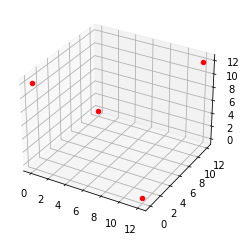

In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# plotting the points
for p in vertices:
    ax.scatter(p[0], p[1], p[2], zdir='z', c='r')


IndexError: index 4 is out of bounds for axis 1 with size 4

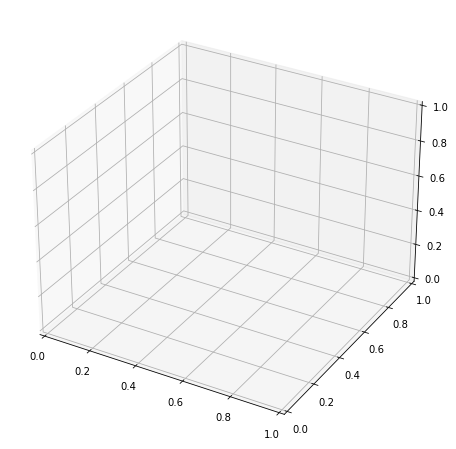

In [18]:

#fig = plt.figure(figsize=(8,6))

#ax = fig.add_subplot(111,projection='3d')
#colmap = cm.ScalarMappable(cmap=cm.hsv)
#colmap.set_array(v[:,4])

#print(v[:,4])
#print(max(v[:,4]))
#colors = cm.hsv(v[:,4]/max(v[:,4]))
#print(colors)

#yg = ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], c=colors, marker='o')
#cb = fig.colorbar(colmap)

# creating figures
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

# setting color bar
#color_map = cm.ScalarMappable(cmap=cm.hot)
#color_map.set_array(v[:,4]/max(v[:,4]))
colors = v[:,4]/max(v[:,4])

print(v[:,4]/max(v[:,4]))
print(colors)

# creating the heatmap
map_1 = ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], c = colors,cmap='hot',s=200)

cbar = plt.colorbar(map_1,fraction=0.026, pad=0.04)
cbar.set_label('wavefunction amplitude')
plt.show()
fig.savefig('CO2_Ru_wavefunc.png',dpi=300)

In [ ]:
print(repr(H_oper))

In [ ]:
U = np.exp(2*np.pi*1j*H_oper)
print(repr(U))

In [ ]:
(1899*0+43*(1/8)+12*(2/8)+5*(3/8)+7*(4/8)+6*(-3/8)+18*(-2/8)+58*(-1/8))/2048